In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
# DATA PATH
RAW_DATA_PATH = os.path.join("..","datasets","raw","airline_passengers.csv")
RAW_DATA_PATH

'../datasets/raw/airline_passengers.csv'

In [3]:
air = pd.read_csv(RAW_DATA_PATH)
air.set_index('Month', inplace=True)
air

,AirPassengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [4]:
# Seasonal ARIMA Model
# ===================================================================
smodel = pm.auto_arima(air.AirPassengers, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.24 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.31 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.43 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.29 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,1)(1,1,1)[12]     

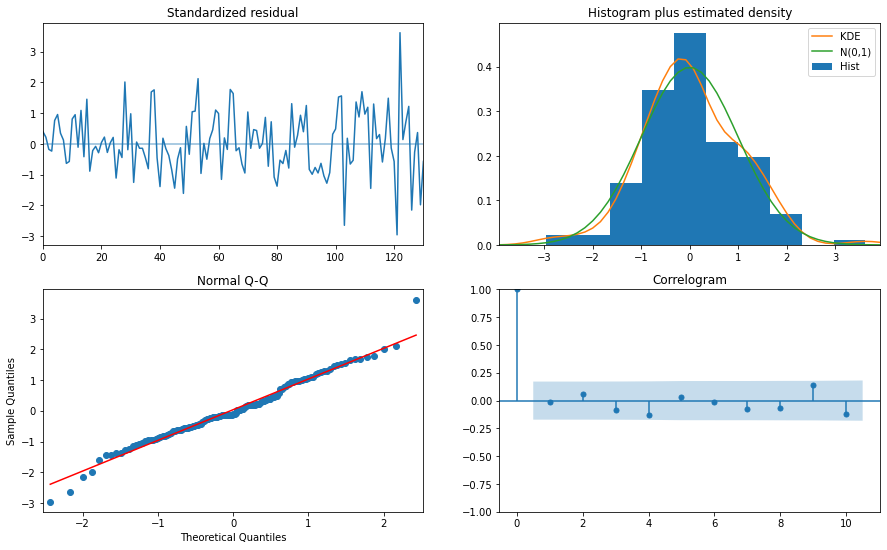

In [5]:
# Seasonal ARIMA Model Diagnostic
smodel.plot_diagnostics(figsize=(15,9))
plt.show()

In [9]:
# Seasonal ARIMA Forecast
n_periods = 12
smodel_forecast, smodel_confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(air.index[-1], periods=n_periods, freq='MS')

# make series for plotting purpose
forecast_series = pd.Series(smodel_forecast, index=index_of_fc)
lower_series = pd.Series(smodel_confint[:, 0], index=index_of_fc)
upper_series = pd.Series(smodel_confint[:, 1], index=index_of_fc)

# Plot
fig, ax = plt.subplots(figsize=(24,9))
ax.plot(air.AirPassengers, color="b")
#ax.plot(test, color="r")
ax.plot(forecast_series, color='darkgreen')
ax.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
ax.legend(["Train","Test","Forecast"])

plt.title("SARIMA: Final Forecast of Air Passengers")
#plt.savefig("sarima_forecast.jpg")
plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [ ]:
# Seasonal ARIMA Performance Metrics
sarima_performance = forecast_accuracy(test.values, smodel_forecast)
print("Seasonal ARIMA Performance:")
print("="*24)
for k, v in sarima_performance.items():
    print(k +" : "+ str(v))

### Final Forecast

In [ ]:
# Seasonal ARIMA Model
# ===================================================================
smodel = pm.auto_arima(air.AirPassengers, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())

In [ ]:
# Final Seasonal ARIMA Model Diagnostic
smodel.plot_diagnostics(figsize=(15,9))
plt.show()

In [ ]:
# Seasonal ARIMA Forecast
n_periods = 12
final_smodel_forecast, final_smodel_confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(air.AirPassengers.index[-1], periods=n_periods, freq='MS')

# make series for plotting purpose
final_forecast_series = pd.Series(final_smodel_forecast, index=index_of_fc)
lower_series = pd.Series(final_smodel_confint[:, 0], index=index_of_fc)
upper_series = pd.Series(final_smodel_confint[:, 1], index=index_of_fc)

# Plot
fig, ax = plt.subplots(figsize=(24,9))
ax.plot(air.AirPassengers, color="b")
ax.plot(final_forecast_series, color='darkgreen')
ax.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
ax.legend(["Actual","Forecast"])

plt.title("SARIMA: Final Forecast of Air Passengers")
#plt.savefig("final_sarima_forecast.jpg")
plt.show()

In [ ]:
# Metric Performance
# ===========================================================

MAPE(final_smodel_forecast, test.values).round(3)

In [ ]:
final_forecast_series